# Analysis of additional experiments, investigating stimulation in one or four modules

```
python ./ana/process_conditions.py -t exp_mod_comp -i ./dat/experiments/raw/  -o ./dat/experiments/processed/
```

In [1]:
# The autoreload extension allows you to tweak the code in the imported modules (`pp`)
# and rerun cells to reflect the changes.
# 
%reload_ext autoreload
%autoreload 2
%reload_ext ipy_dict_hierarchy
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import sys
sys.path.append("../ana/")
sys.path.append("./../")

from ana import paper_plots as pp
# reduce the printed output, we have lots of details on the INFO level.
pp.log.setLevel("ERROR")

ah = pp.ah
ph = pp.ph

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pp.load_pd_hdf5("/Users/paul/para/2_Projects/modular_cultures/_repo/_latest/dat.nosync/experiments/processed_mod_comp/global_s.hdf5")

<class 'dict'>
├── bursts ......................................................... DataFrame
├── isis ........................................................... DataFrame
├── rij ............................................................ DataFrame
├── rij_paired ..................................................... DataFrame
├── mod_rij ........................................................ DataFrame
├── mod_rij_paired ................................................. DataFrame
└── trials ......................................................... DataFrame

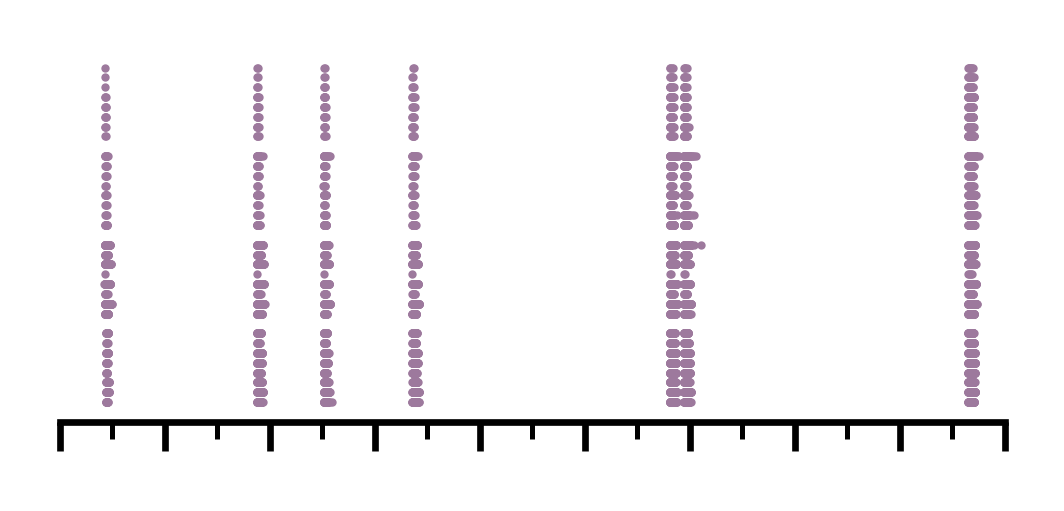

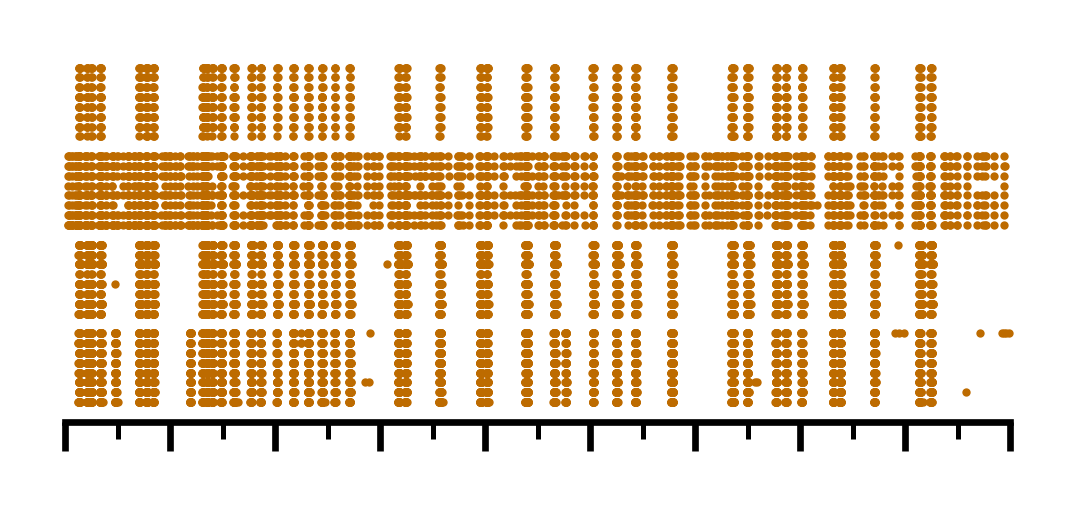

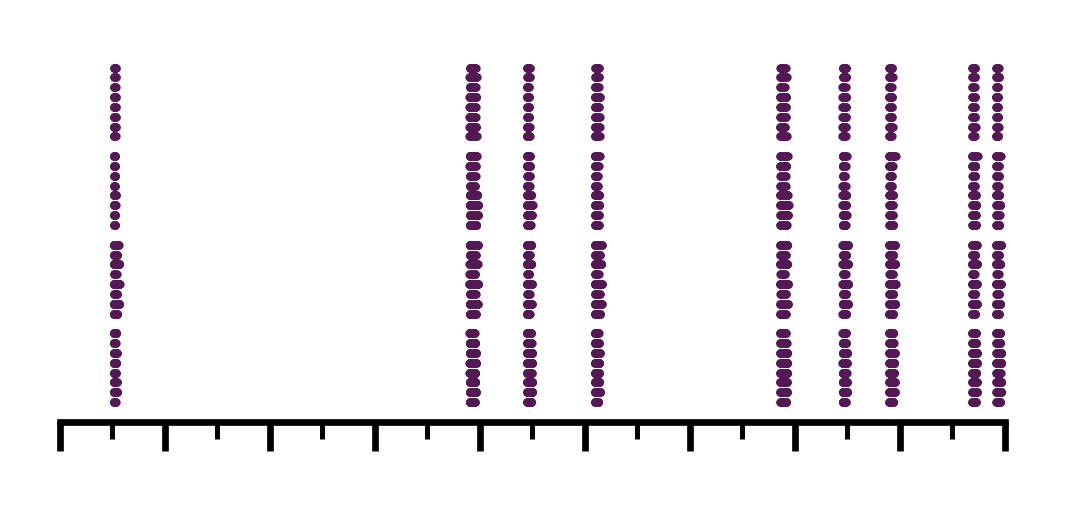

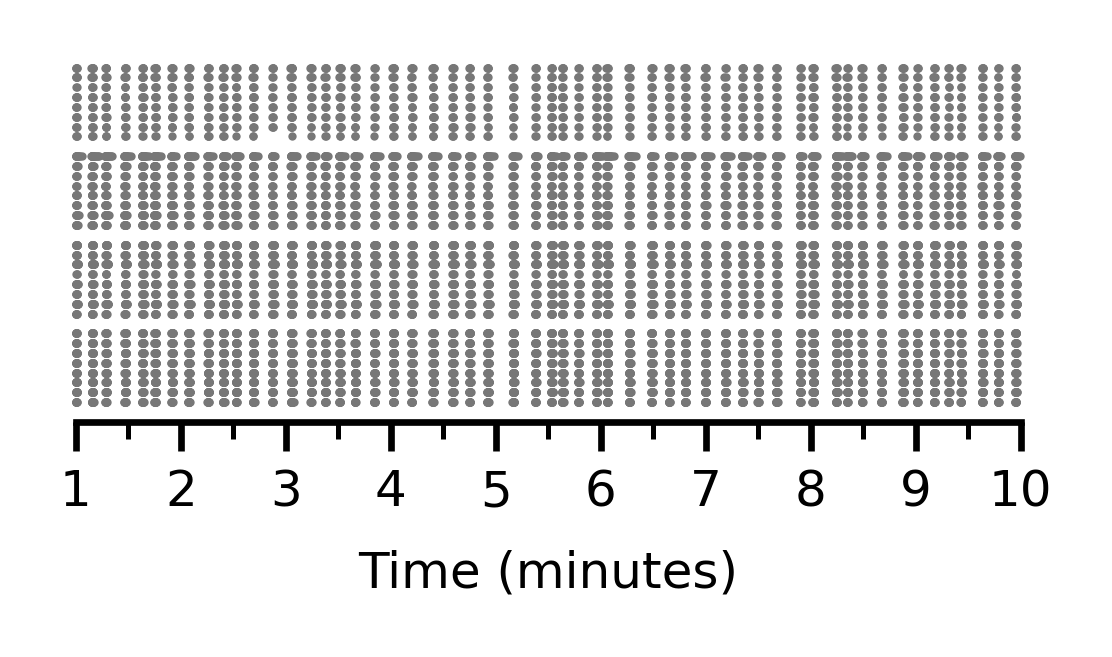

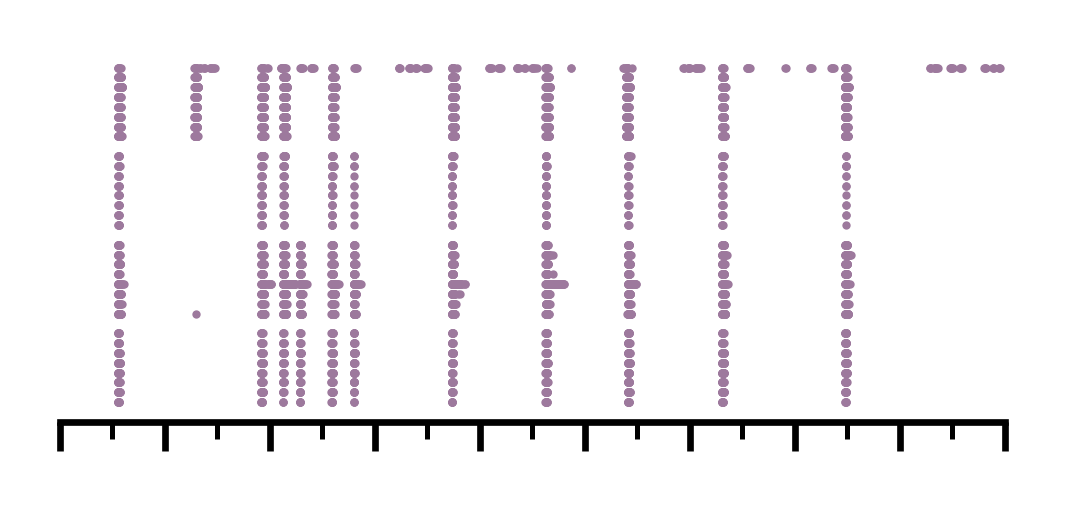

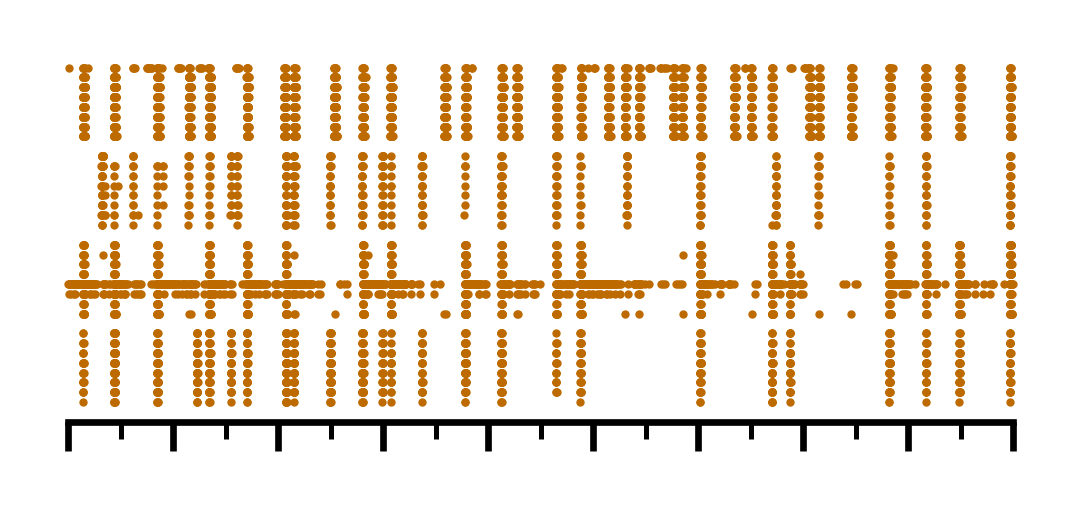

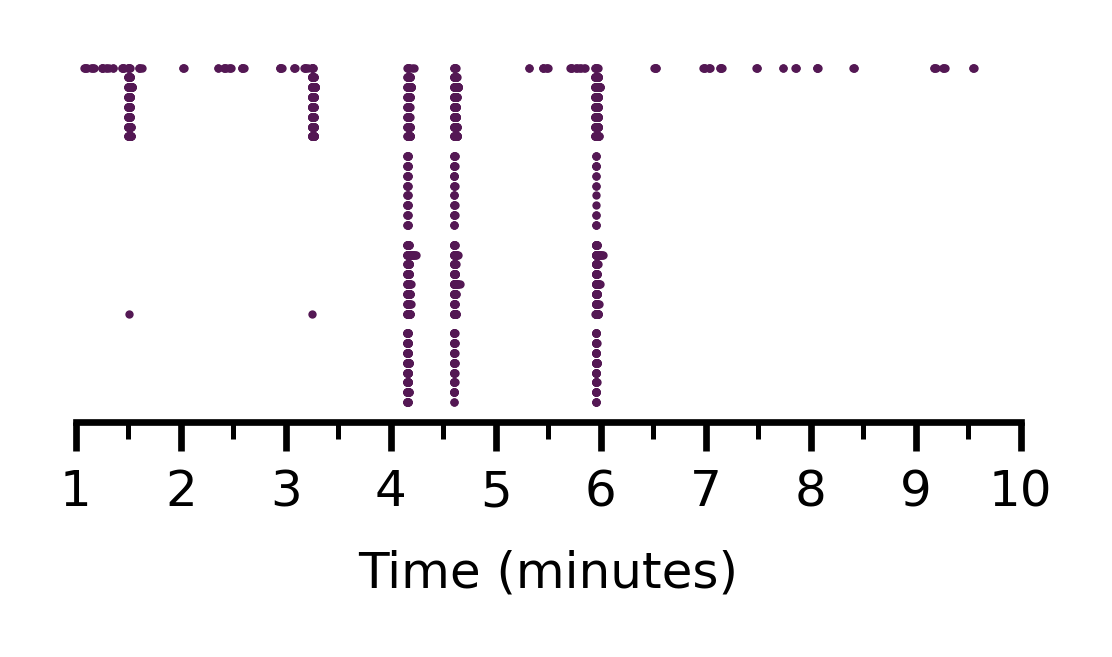

In [3]:
pp.log.setLevel("ERROR")

paradigm = "partial_m"
trial = "230421_1bG_5u"
conditions = ["1_pre", "2_stim2", "3_post", "4_stim1"]

def do_it(paradigm, trial, conditions):

    for cdx, condition in enumerate(conditions):
        c_str = condition[2:]  # description usable for annotating

        # default experimental parameters
        bs_large = 200 / 1000
        threshold_factor = 10 / 100

        h5f = ah.load_experimental_files(
            path_prefix=f"{pp.p_exp}/raw/{paradigm}/{trial}/", condition=condition
        )
        ah.find_rates(h5f, bs_large=bs_large)
        threshold = threshold_factor * np.nanmax(h5f["ana.rates.system_level"])
        ah.find_system_bursts_from_global_rate(
            h5f, rate_threshold=threshold, merge_threshold=0.1
        )

        fig, ax = plt.subplots()
        ph.plot_raster(
            h5f,
            ax,
            # base_color=colors[c_str],
            color=pp.colors[c_str],
            sort_by_module=True,
            neuron_id_as_y=False,
            clip_on=False,
            markersize=2.0,
            alpha=1,
            zorder=-5,
        )

        # ax.set_ylim(-3, len(h5f["ana.neuron_ids"]) + 1.5)
        ax.set_ylim(0, len(h5f["ana.neuron_ids"]))
        ax.set_xlim(0, 540)
        sns.despine(ax=ax, left=True, bottom=False)
        ax.yaxis.set_visible(False)
        # ax.xaxis.set_visible(False)
        ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(30))
        ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(60))

        ax.set_ylabel("")
        ax.set_xlabel("")
        if cdx != len(conditions) - 1:
            # pp._time_scale_bar(ax=ax, x1=475, x2=535, y=-0.5, ylabel=-2.5, label="60 s")
            ax.set_xticklabels([])
        else:
            ax.set_xticklabels(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"])
            ax.set_xlabel("Time (minutes)")
        pp.cc.set_size(ax, 4, 1.5, b=0.8, l=0.2, t=0.1, r=0.2)

        out_file_name = f"{pp.p_fo}/sm_rev_"
        out_file_name += f"raster_{paradigm}_{condition}_{trial}.pdf"
        ax.get_figure().savefig(out_file_name, transparent=True, dpi=900)

do_it(paradigm, trial, conditions)


paradigm = "global_m"
trial = "230420_1bA_5u"
conditions = ["1_pre", "2_stim", "3_post"]
do_it(paradigm, trial, conditions)



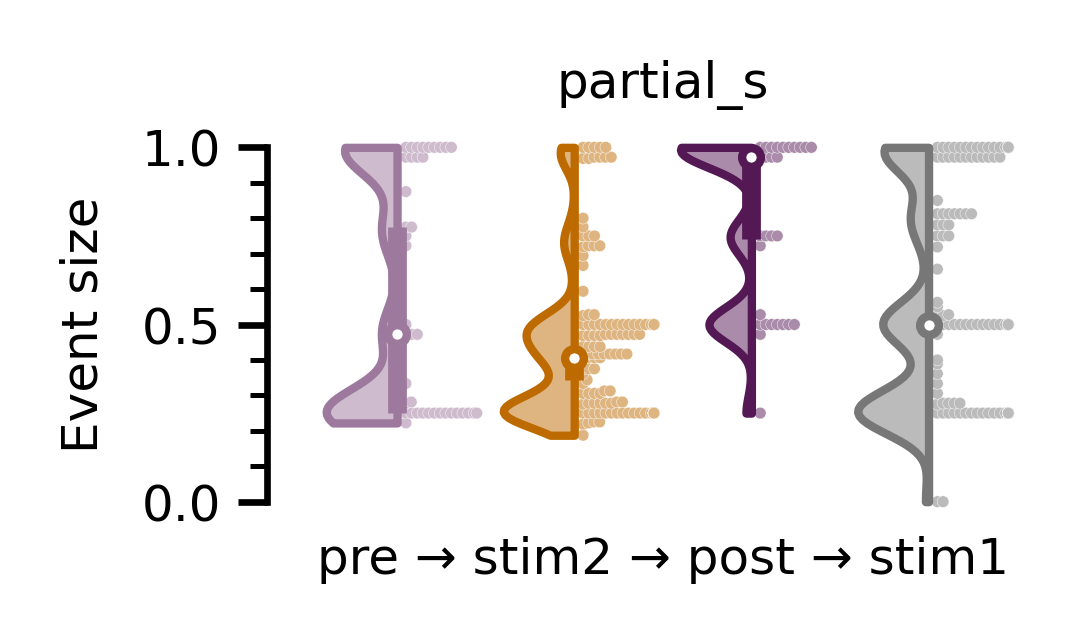

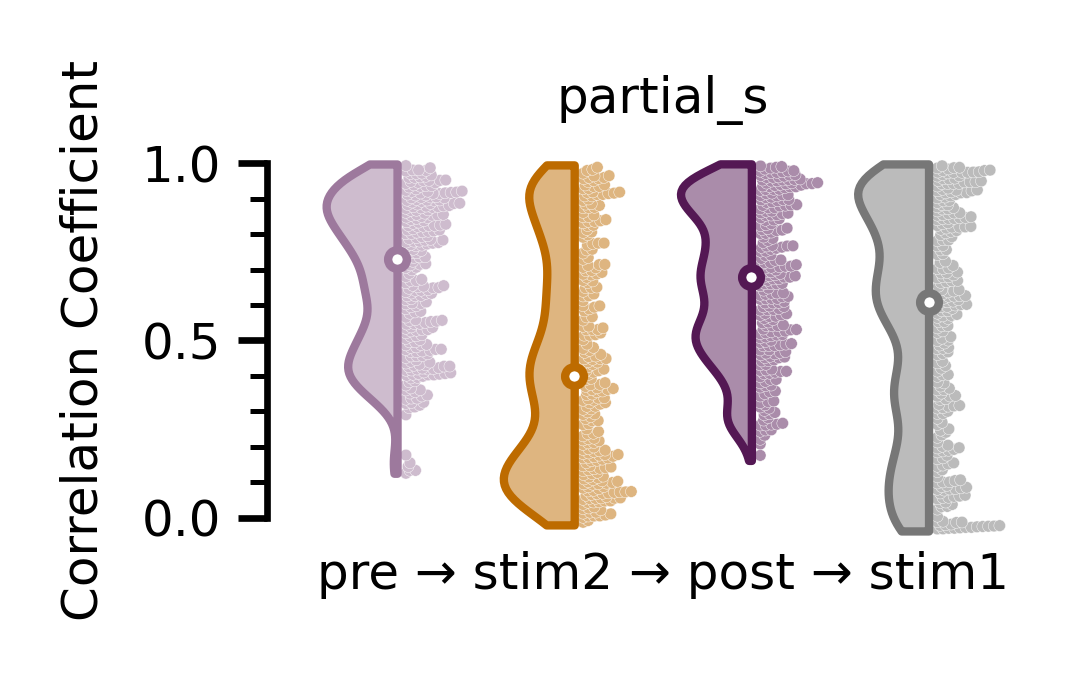

In [4]:
pp.log.setLevel("ERROR")
pp.show_xlabel = True
pp.show_ylabel = True
pp.show_title = True
pp.exp_violins_for_layouts(
    pd_folder=f"{pp.p_exp}/processed_mod_comp",
    out_prefix=f"{pp.p_fo}/sm_rev_",
    layouts=["partial_s"],
    observables = ["event_size", "rij"],
);

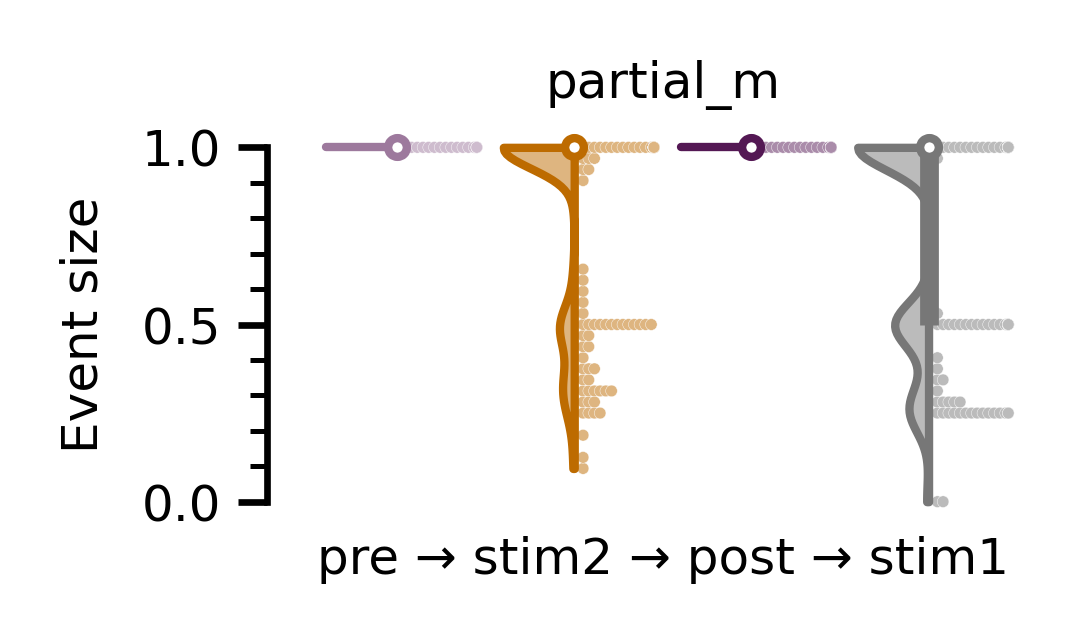

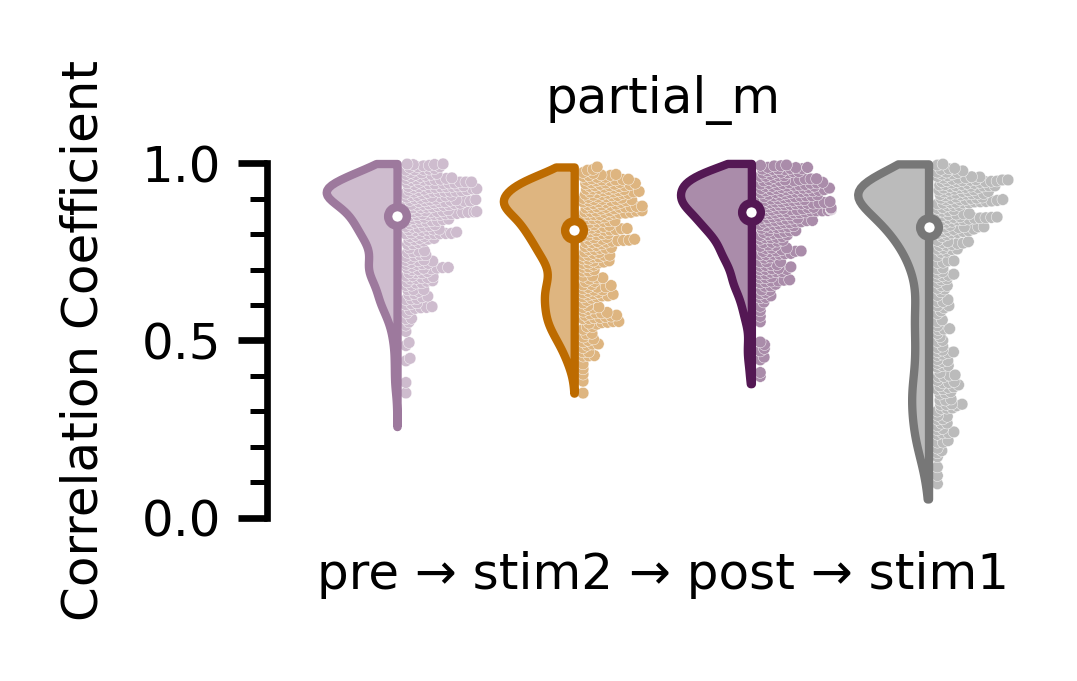

In [5]:
pp.exp_violins_for_layouts(
    pd_folder=f"{pp.p_exp}/processed_mod_comp",
    out_prefix=f"{pp.p_fo}/sm_rev_",
    layouts=["partial_m"],
    observables = ["event_size", "rij"],
);

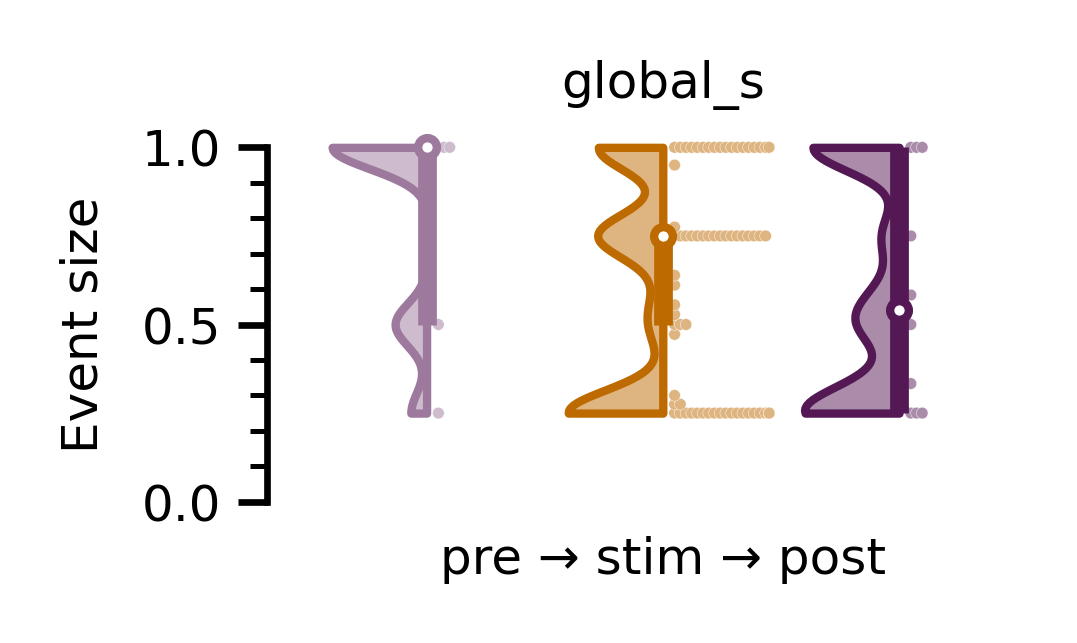

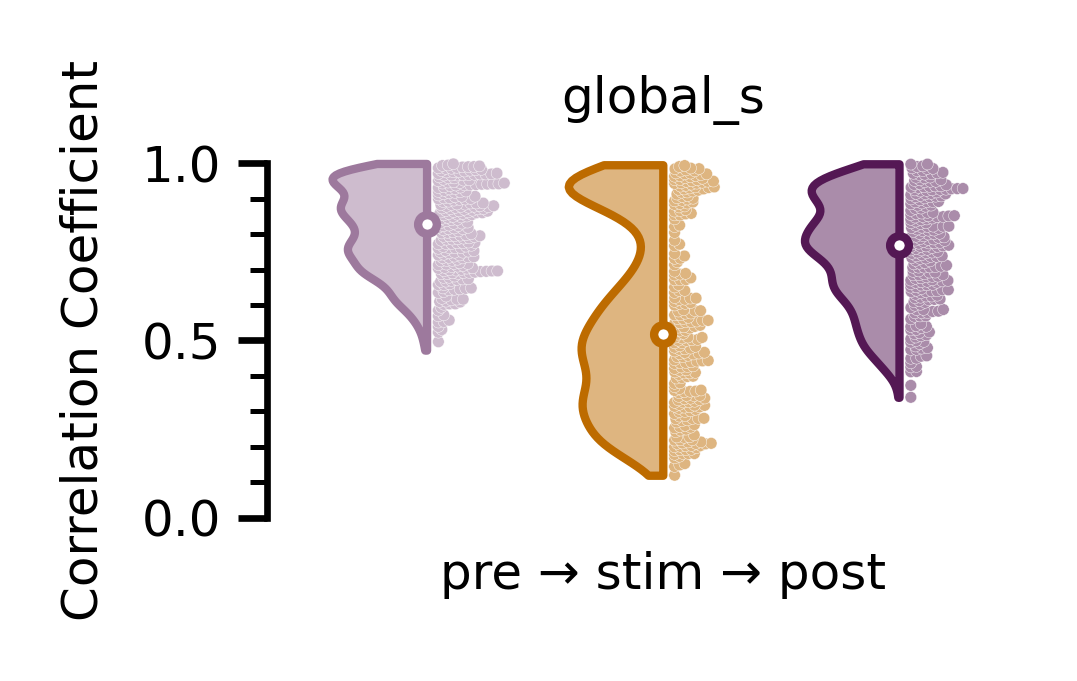

In [6]:
pp.exp_violins_for_layouts(
    pd_folder=f"{pp.p_exp}/processed_mod_comp",
    out_prefix=f"{pp.p_fo}/sm_rev_",
    layouts=["global_s"],
    observables = ["event_size", "rij"],
);

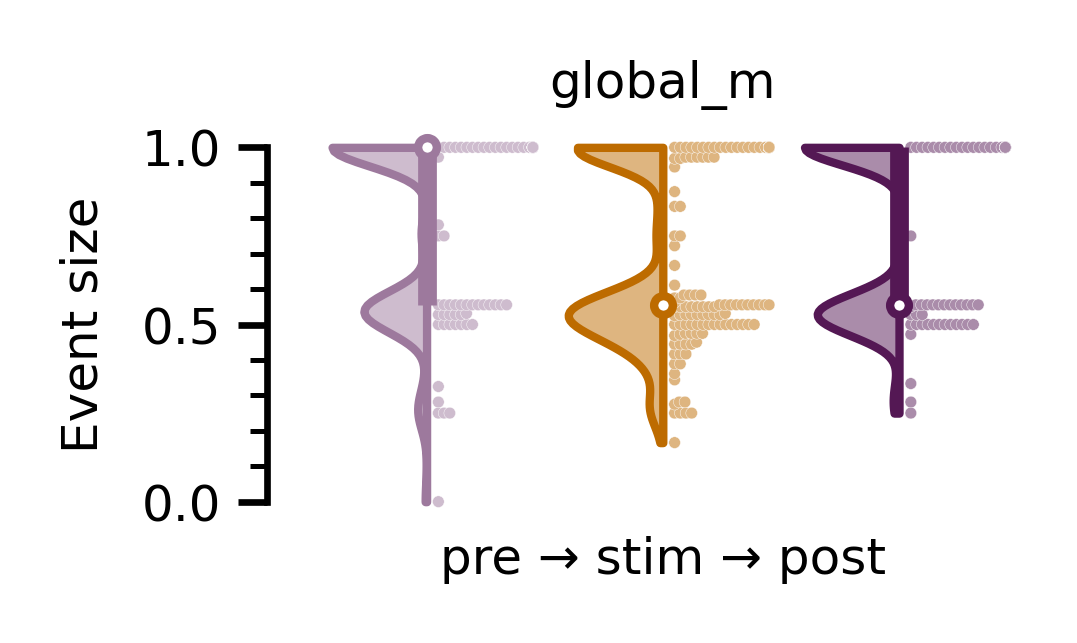

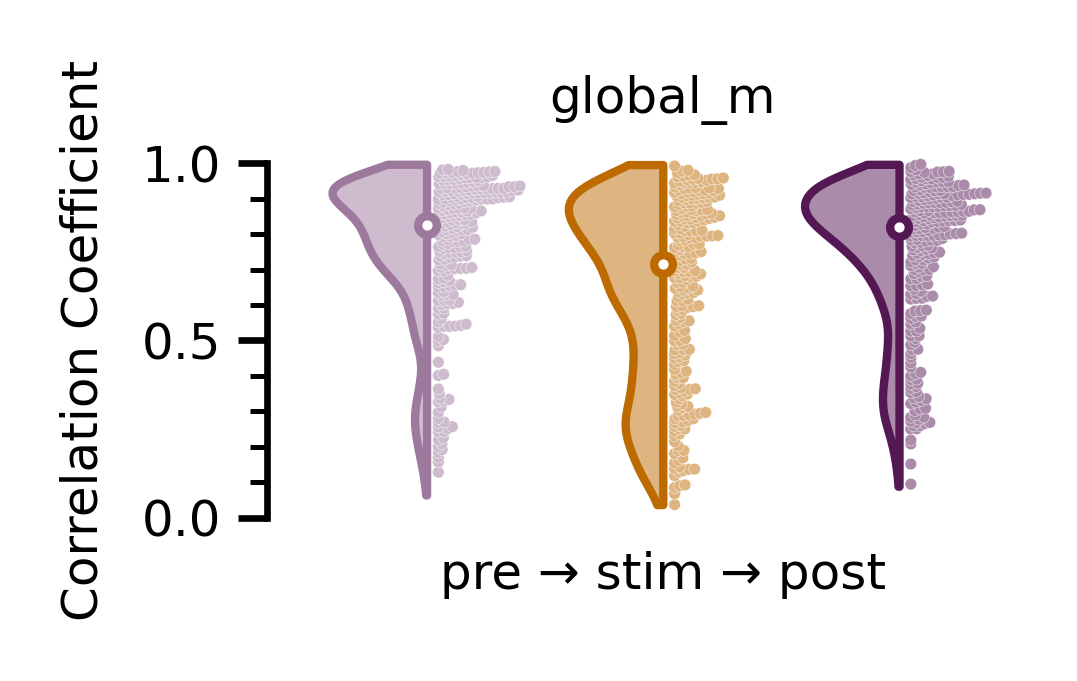

In [7]:
pp.exp_violins_for_layouts(
    pd_folder=f"{pp.p_exp}/processed_mod_comp",
    out_prefix=f"{pp.p_fo}/sm_rev_",
    layouts=["global_m"],
    observables = ["event_size", "rij"],
);

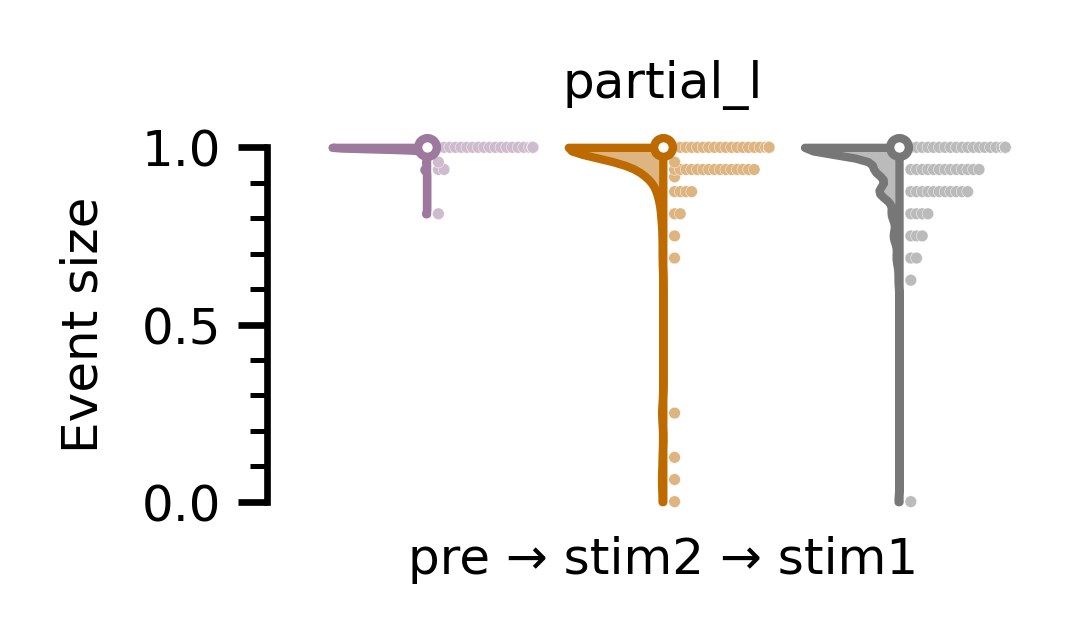

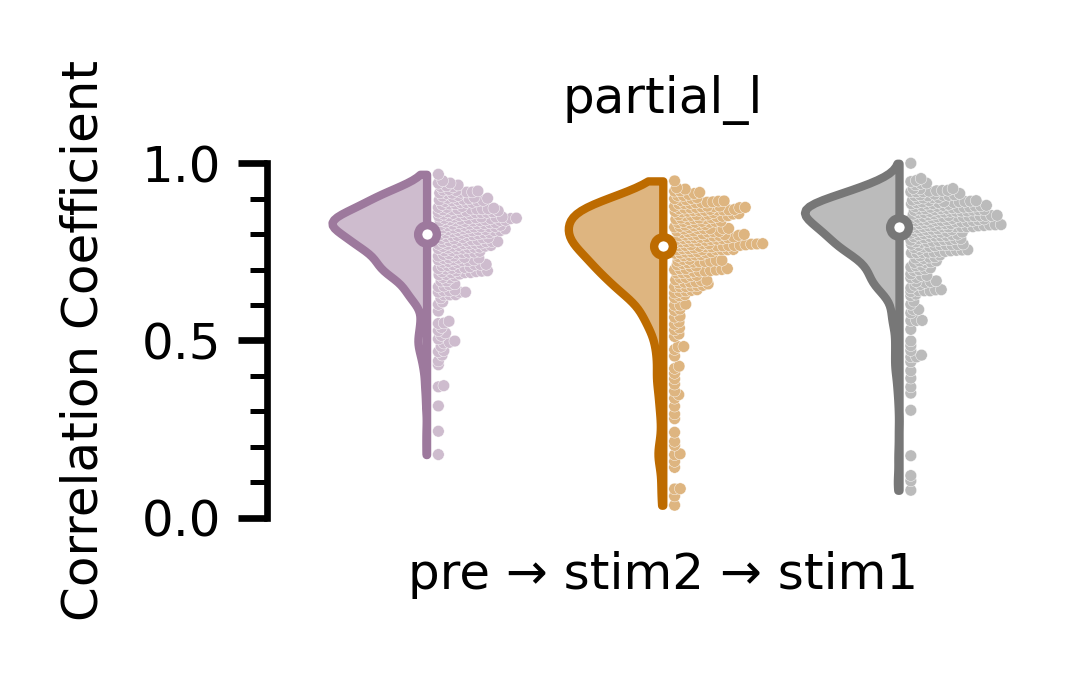

In [8]:
pp.exp_violins_for_layouts(
    pd_folder=f"{pp.p_exp}/processed_mod_comp",
    out_prefix=f"{pp.p_fo}/sm_rev_",
    layouts=["partial_l"],
    observables = ["event_size", "rij"],
);

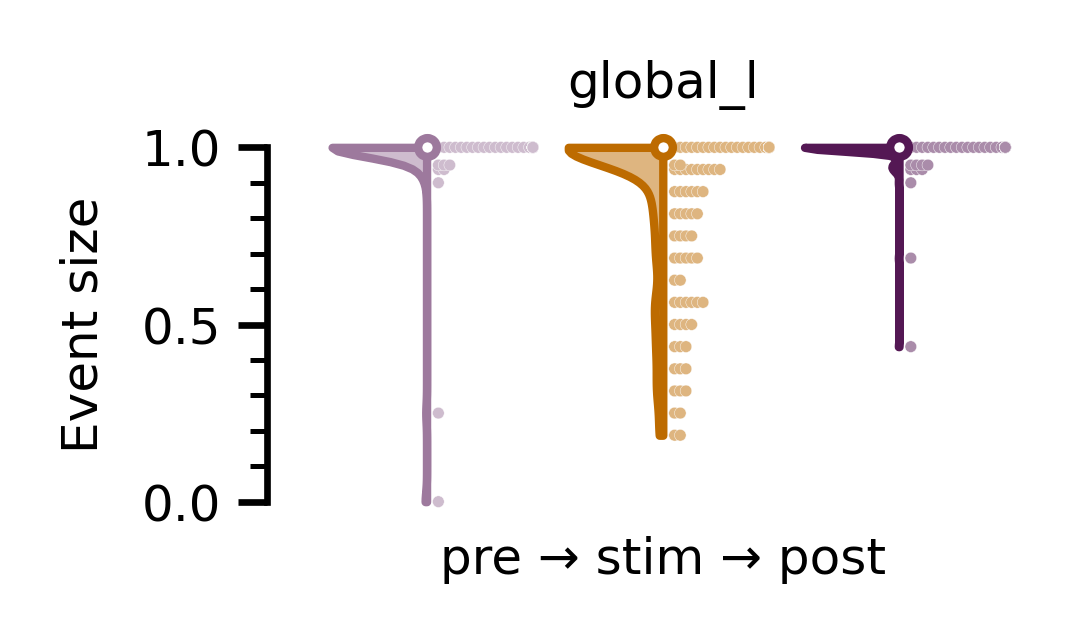

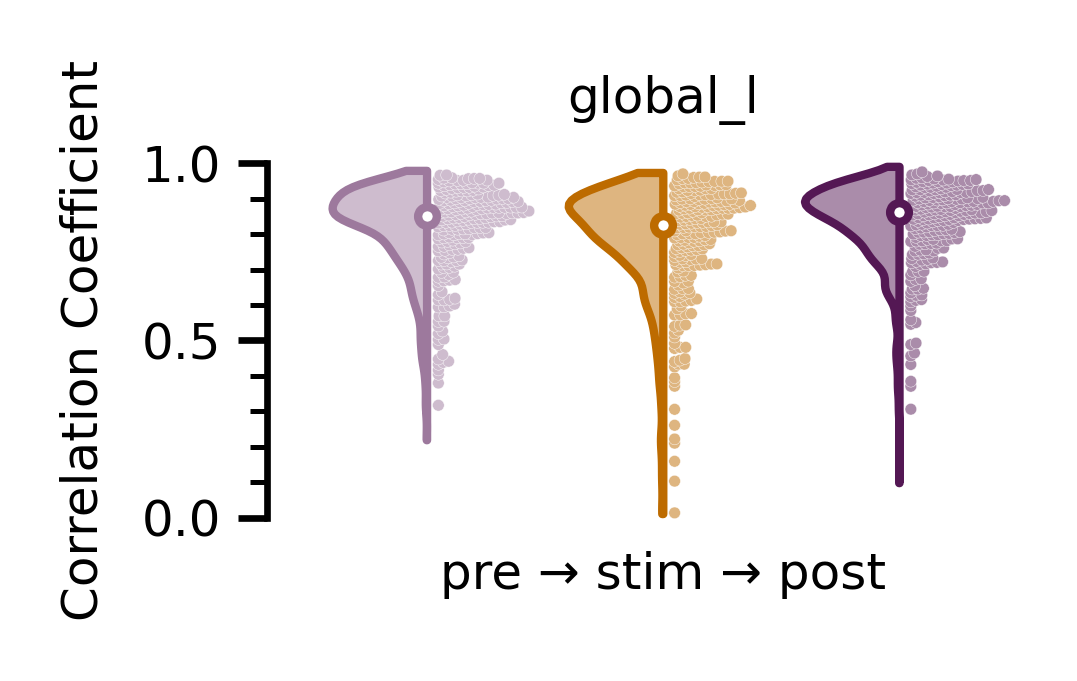

In [9]:
pp.exp_violins_for_layouts(
    pd_folder=f"{pp.p_exp}/processed_mod_comp",
    out_prefix=f"{pp.p_fo}/sm_rev_",
    layouts=["global_l"],
    observables = ["event_size", "rij"],
);

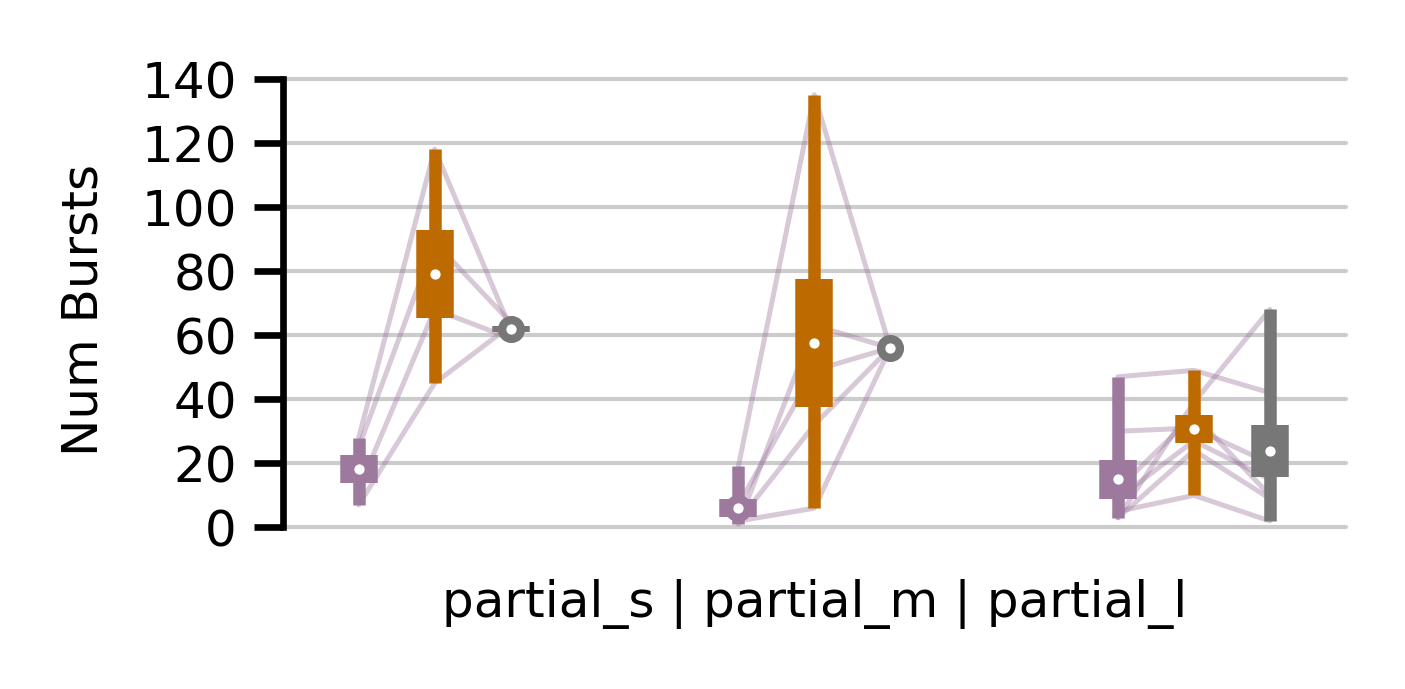

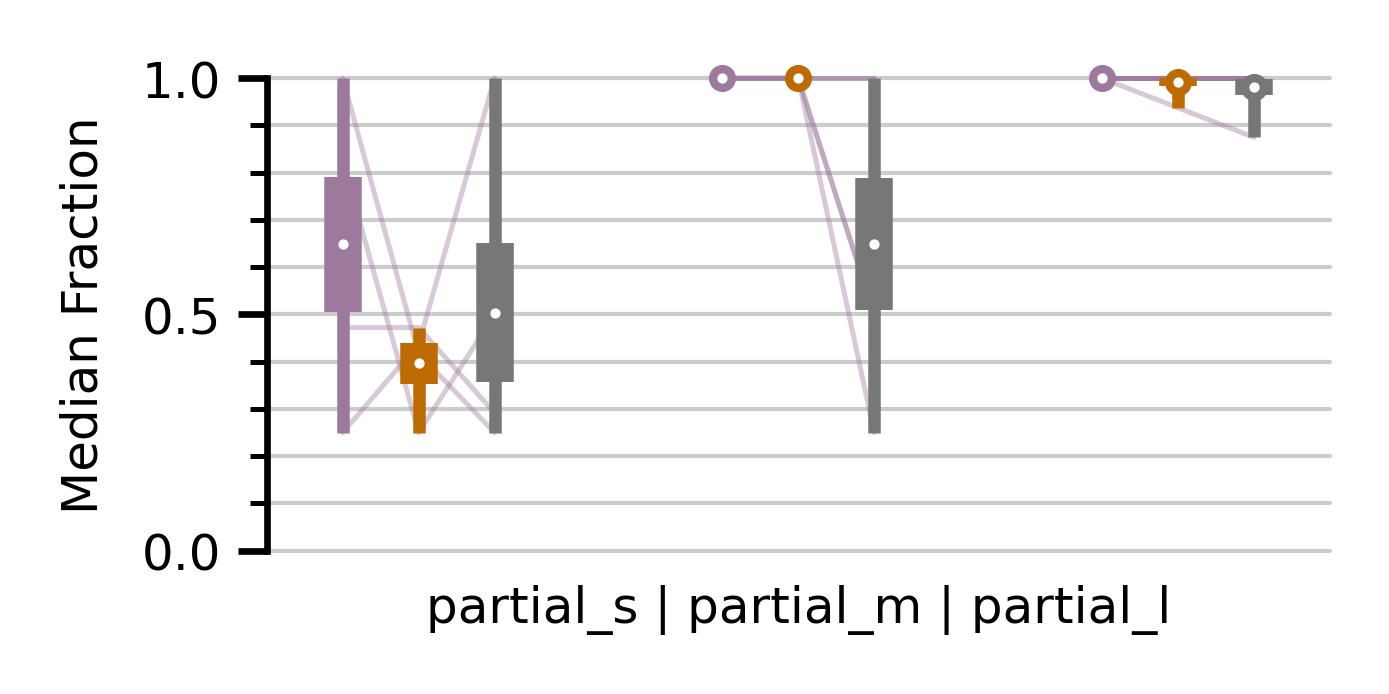

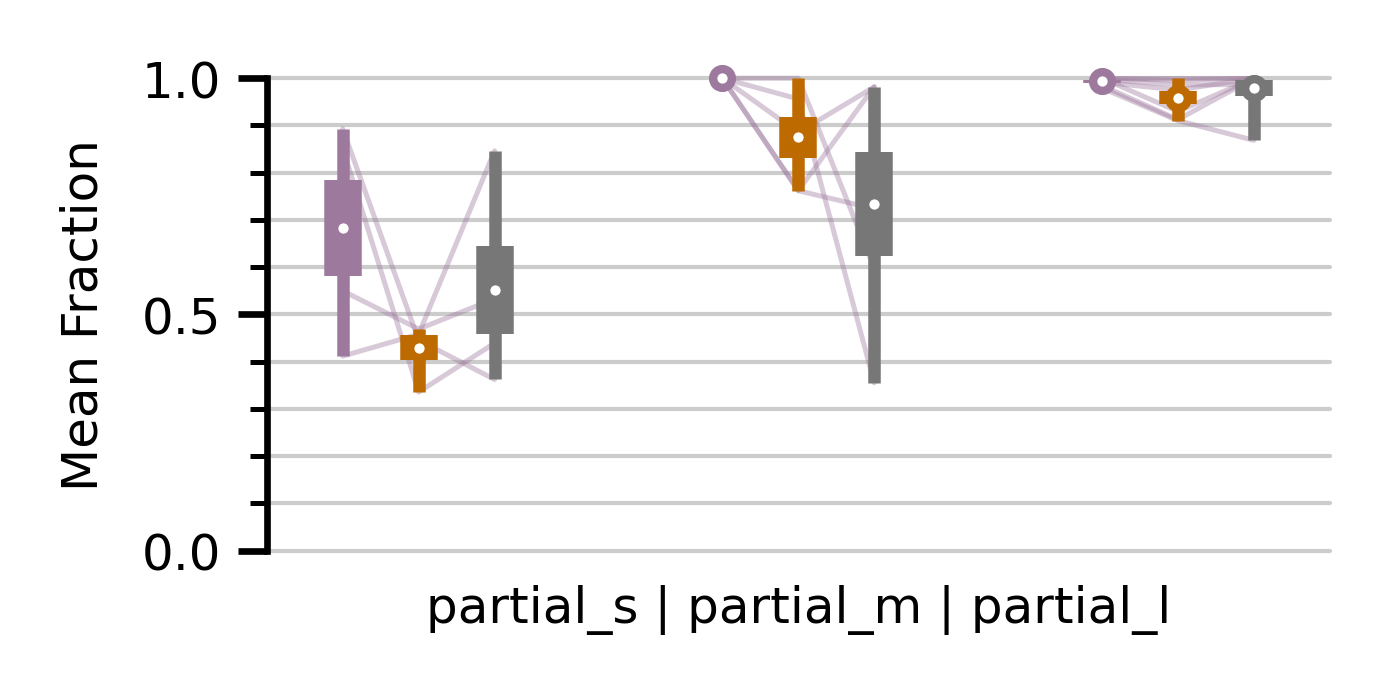

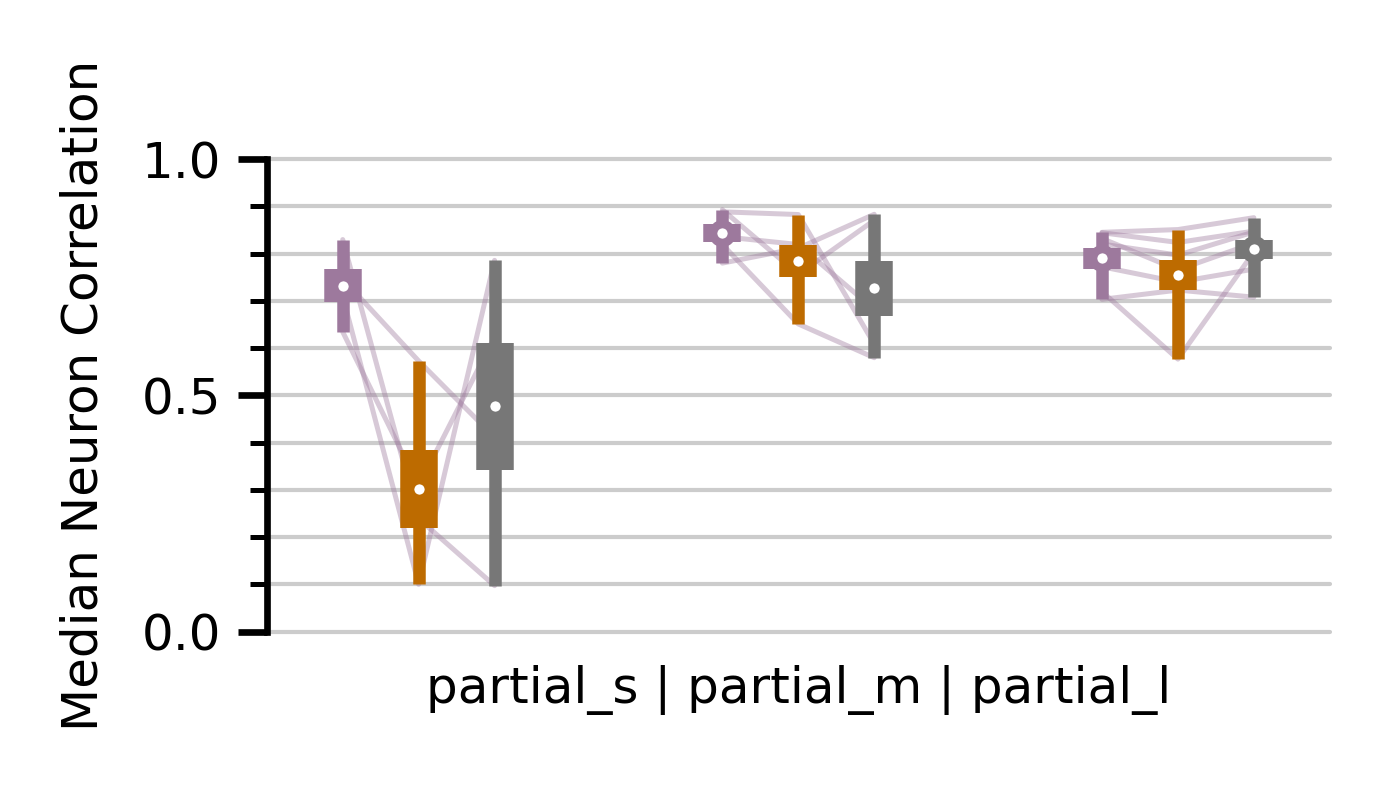

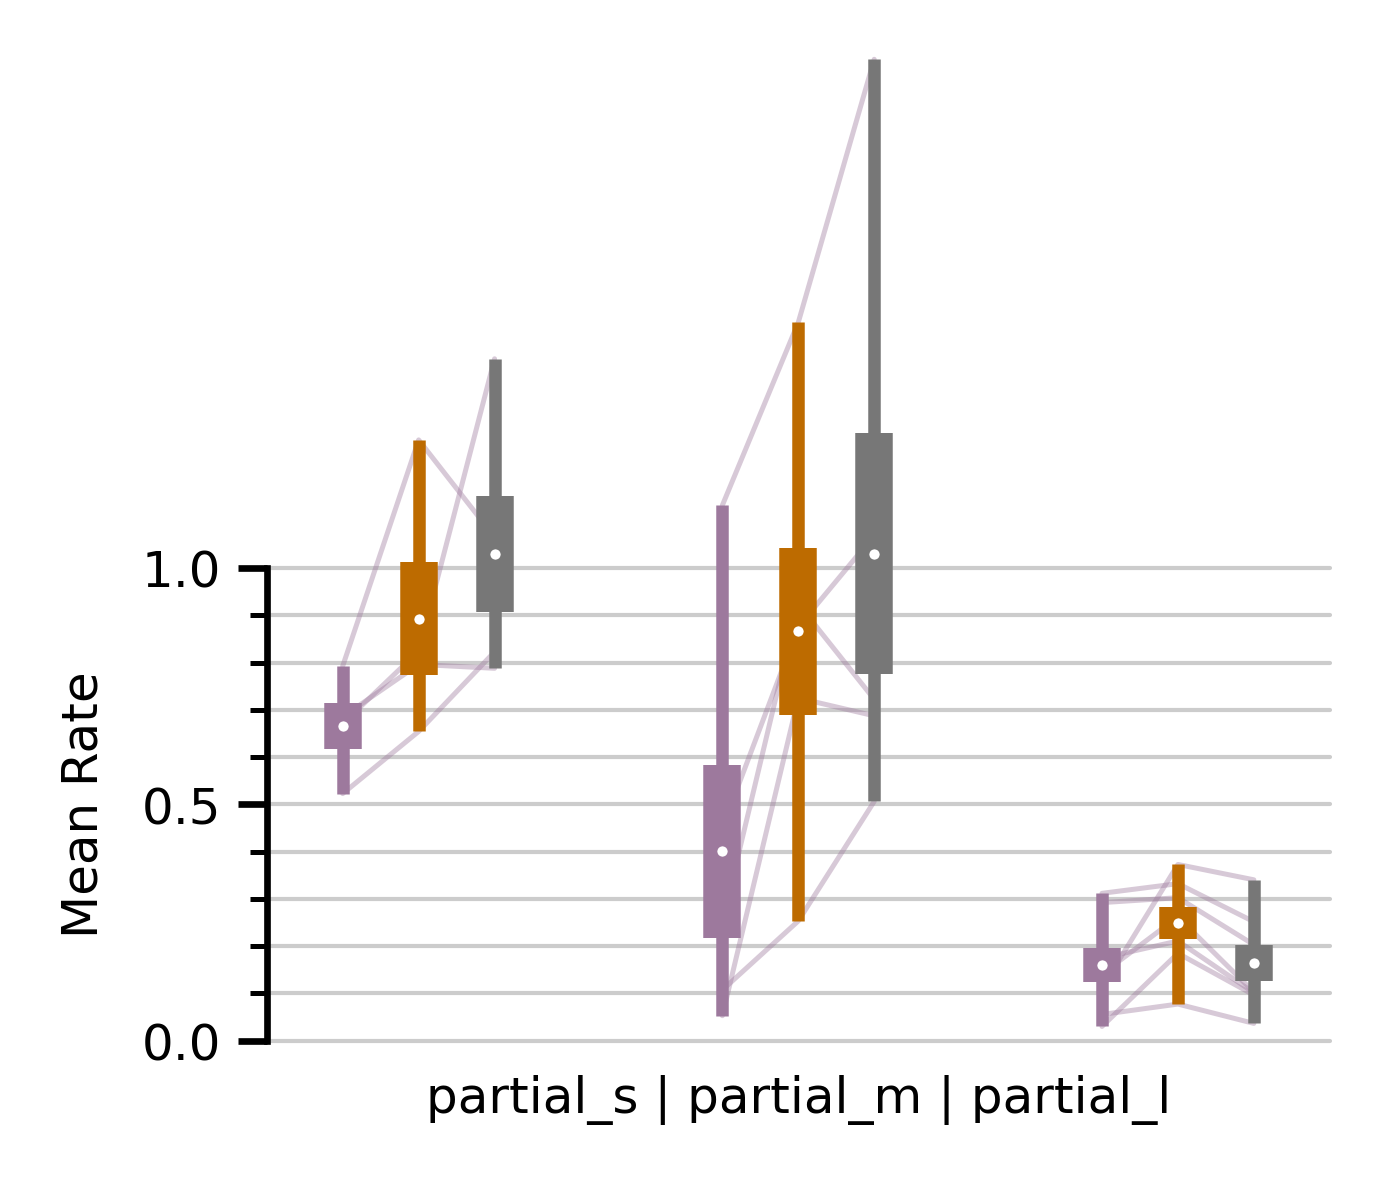

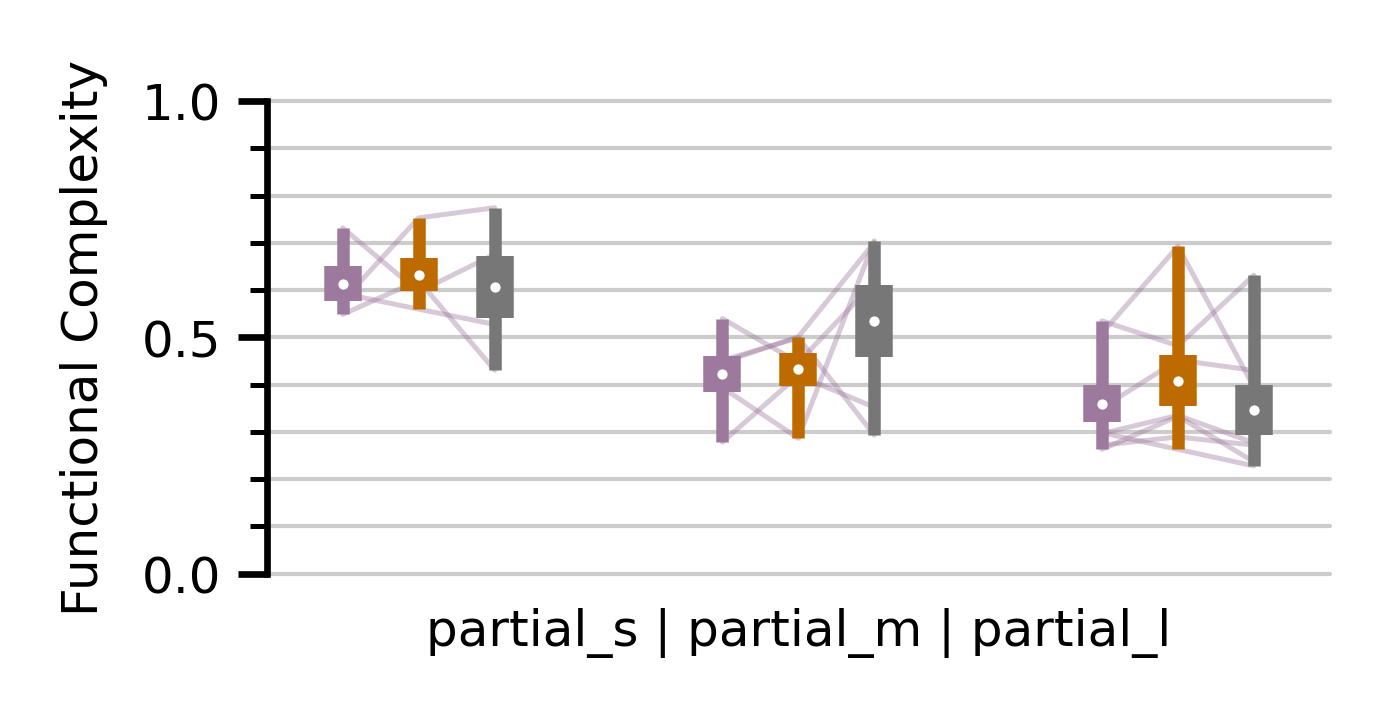

In [10]:
pp.log.setLevel("ERROR")
pp.show_xlabel = True

which = "partial"
# which = "global"

for obs in [
    "Num Bursts",
    "Median Fraction",
    "Mean Fraction",
    "Median Neuron Correlation",
    "Mean Rate",
    "Functional Complexity",
]:
    try:
        ax = pp.exp_sticks_across_layouts(
            pd_folder=f"{pp.p_exp}/processed_mod_comp",
            conditions={
                "partial_s": ["pre", "stim2", "stim1"],
                "partial_m": ["pre", "stim2", "stim1"],
                "partial_l": ["pre", "stim2", "stim1"],
            }
            if which == "partial"
            else {
                "global_s": ["pre", "stim"],
                "global_m": ["pre", "stim"],
                "global_l": ["pre", "stim"],
            },
            draw_trials=True,
            # draw_error_bars=True if "Fraction" not in obs else False,
            observable=obs,
            small_dx=0.6,
            large_dx=3.0,
            set_ylim=False if obs in ["Num Bursts", "Mean IBI"] else True,
        )
        pp.cc.set_size(ax, 4.5, 2, l=1.5, b=0.5, r=0.5, t=0.7)
    except Exception as e:
        print(e)

    ax.get_figure().savefig(
        f"{pp.p_fo}/sm_rev_{which}_{obs.lower().replace(' ', '_')}.pdf", dpi=300
    )


In [11]:
# df = pp.load_pd_hdf5(f"{pp.p_exp}/processed/1b.hdf5")['trials']
df = pp.load_pd_hdf5(f"{pp.p_exp}/processed_mod_comp/partial_2u.hdf5")['trials']
df.set_index(["Trial", "Condition"], inplace=True)
df = df[["Num Bursts", "Median Neuron Correlation", "Median Fraction", "Mean Fraction", "Functional Complexity"]]
df

AssertionError: file not found: /Users/paul/para/2_Projects/modular_cultures/_repo/_latest/dat/experiments/processed_mod_comp/partial_2u.hdf5

In [ ]:
import pandas as pd

ah = pp.ah

dfs = []
for file in ["global_2u", "partial_2u"]:
    df = pp.load_pd_hdf5(f"{pp.p_exp}/processed_mod_comp/{file}.hdf5")["bursts"]
    dfs.append(df)

df = pd.concat(dfs)
df = df.query("`Fraction` > 0")
df = df.query("`Condition` in ['pre', 'post']")
df


,Duration,Sequence length,Core delay,Fraction,Onset duration,Inter-burst-interval,Condition,Trial,Stimulation,Type
0,6.6825,4,0.200000,1.00,0.15,133.1650,pre,230425_1bK_2u,Off,exp_mod_comp
1,6.1045,4,0.250000,1.00,0.15,NaN,pre,230425_1bK_2u,Off,exp_mod_comp
2,5.1575,2,0.000000,0.50,0.25,32.5155,pre,230425_1bM_2u,Off,exp_mod_comp
3,2.2735,1,NaN,0.25,0.15,97.0490,pre,230425_1bM_2u,Off,exp_mod_comp
4,5.9555,2,0.050000,0.50,0.20,44.0480,pre,230425_1bM_2u,Off,exp_mod_comp
...,...,...,...,...,...,...,...,...,...,...
440,2.3325,2,0.020000,0.50,0.15,95.7310,post,230424_1bE_2u,Off,exp_mod_comp
441,1.8545,2,0.034500,0.50,0.05,96.1580,post,230424_1bE_2u,Off,exp_mod_comp
442,2.8490,4,0.245667,1.00,0.35,7.6865,post,230424_1bE_2u,Off,exp_mod_comp
443,2.7925,2,0.199000,0.50,0.10,53.7500,post,230424_1bE_2u,Off,exp_mod_comp


In [ ]:
import pandas as pd

ah = pp.ah

dfs = []
for file in ["global_5u", "partial_5u"]:
    df = pp.load_pd_hdf5(f"{pp.p_exp}/processed_mod_comp/{file}.hdf5")["bursts"]
    dfs.append(df)

df = pd.concat(dfs)
df = df.query("`Fraction` > 0")
df = df.query("`Condition` in ['pre', 'post']")

print(f"{len(df)} bursts in total")

# create empty dataframe with all the columns we want to fill
res = pd.DataFrame(
    columns=[
        "Sample Size",
        "Mean",
        "Std",
        "2.5%",
        "25%",
        "50%",
        "75%",
        "97.5%",
    ]
)

dists = dict()

for sample_size in [1, 3, 5, 10, 100]:
    mid, std, percentiles = ah.pd_bootstrap(
        df,
        obs="Fraction",
        num_boot= 2000,
        sample_size=sample_size,
        f_within_sample=np.median,
        f_across_samples=np.mean,
        percentiles=[2.5, 25, 50, 75, 97.5],
    )

    res.loc[len(res)] = [
        sample_size,
        mid,
        std,
        *percentiles,
    ]

res.set_index("Sample Size", inplace=True)
res

    


321 bursts in total


,Mean,Std,2.5%,25%,50%,75%,97.5%
Sample Size,,,,,,,
1.0,0.817809,0.242324,0.281250,0.555556,1.0,1.0,1.0
3.0,0.855358,0.212923,0.500000,0.555556,1.0,1.0,1.0
5.0,0.882385,0.195001,0.500000,0.750000,1.0,1.0,1.0
10.0,0.908087,0.153825,0.543403,0.777778,1.0,1.0,1.0
100.0,0.997436,0.028753,1.000000,1.000000,1.0,1.0,1.0


321 bursts in total


Text(0.5, 0, 'event size')

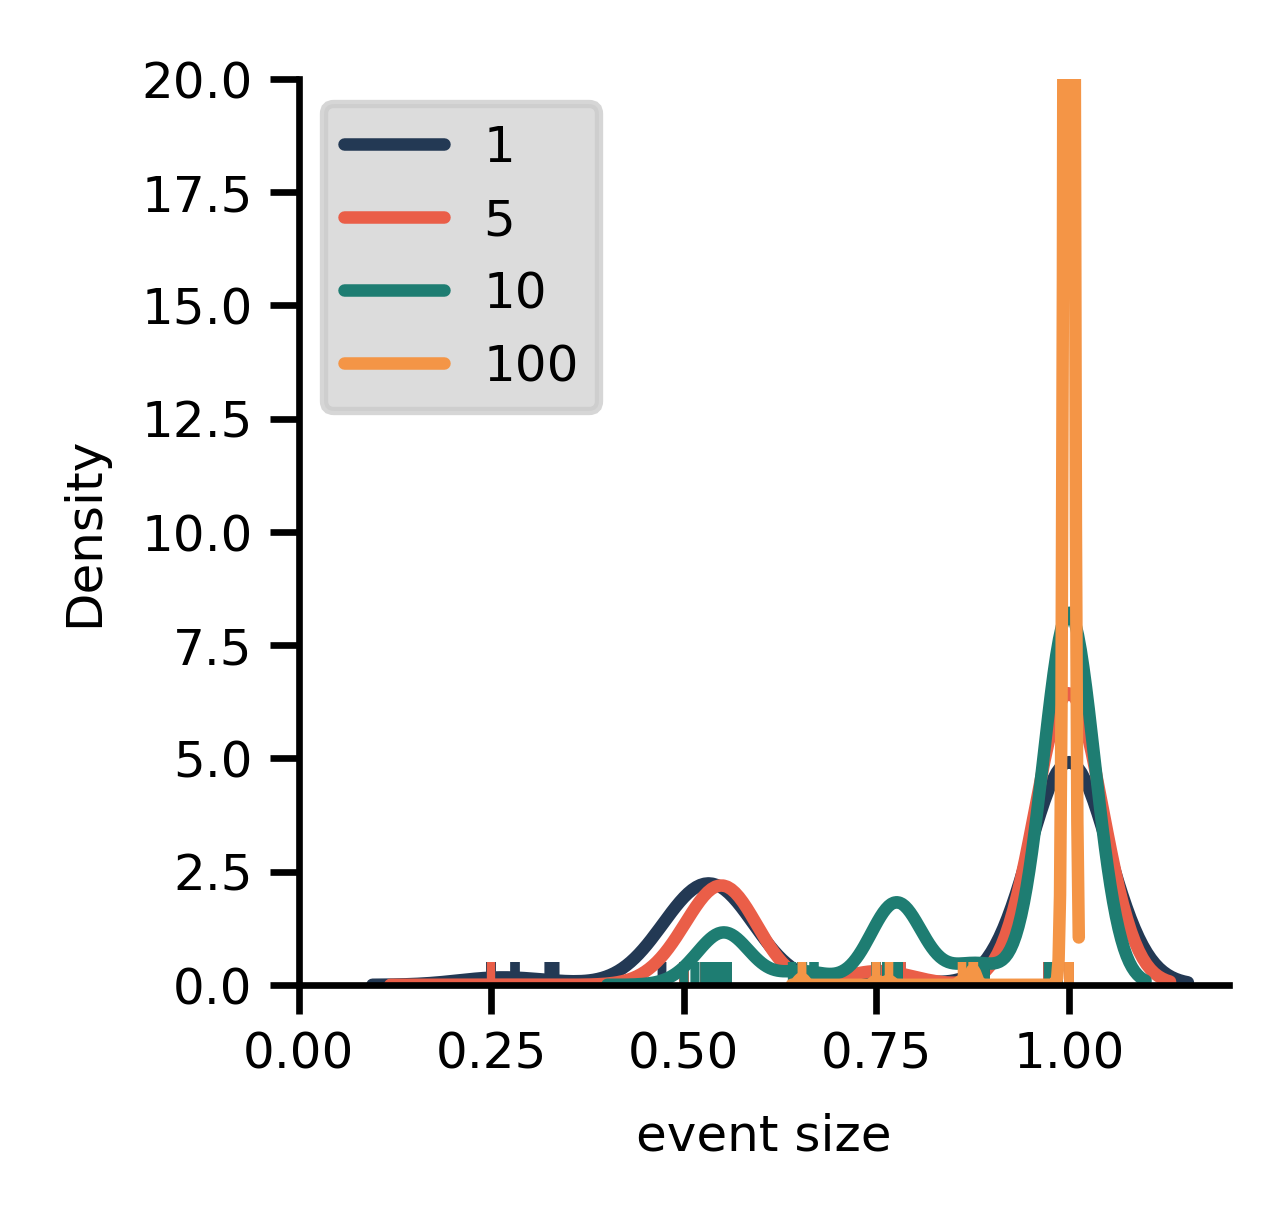

In [ ]:
import pandas as pd
import seaborn as sns

ah = pp.ah

dfs = []
for file in ["global_5u", "partial_5u"]:
    df = pp.load_pd_hdf5(f"{pp.p_exp}/processed_mod_comp/{file}.hdf5")["bursts"]
    dfs.append(df)

df = pd.concat(dfs)
df = df.query("`Fraction` > 0")
df = df.query("`Condition` in ['pre', 'post']")

print(f"{len(df)} bursts in total")

# create empty dataframe with all the columns we want to fill
res = pd.DataFrame(
    columns=[
        "Sample Size",
        "Mean",
        "Std",
        "2.5%",
        "25%",
        "50%",
        "75%",
        "97.5%",
    ]
)

samples = dict()

for sample_size in [1, 5, 10, 100]:
    bss = ah.pd_bootstrap(
        df,
        obs="Fraction",
        num_boot=2000,
        sample_size=sample_size,
        f_within_sample=np.median,
        f_across_samples=np.mean,
        # percentiles=[2.5, 25, 50, 75, 97.5],
        percentiles=np.arange(0, 100, 25),
        return_samples=True,
    )

    samples[sample_size] = bss

fig, ax = plt.subplots(1, 1, figsize=(2, 2))
for s in samples.keys():
    # probability density with seaborn
    sns.distplot(
        samples[s],
        # hist=True,
        # kde=False,
        hist=False,
        kde=True,
        ax=ax,
        label=f"{s}",
        bins=np.arange(-0.125, 1.25, 0.25),
        rug=True,
        hist_kws={
            "histtype": "step",
            "alpha": 1,
        },
    )
# ax.set_yscale("log")
ax.set_ylim(0, 20)
ax.legend(loc="upper left")
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xlabel("event size")
